# Initial housing_data EDA

## Setup

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 
sns.set(style="dark",palette="deep")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

In [72]:
df = pd.read_csv("../../data/housing_data.csv", index_col="id")

## Exploring data

In [73]:
df.head()

,areas,bedrooms,bathrooms,parkingSpots,prices,type,neighborhood
id,,,,,,,
2669329904,324.0,5.0,3.0,4.0,340000.0,house,Sao Tome
2667338201,51.0,2.0,1.5,1.0,295000.0,NaN,Santa Teresa
2643720430,94.0,3.0,4.0,2.0,629000.0,apartment,Cidade Jardim
2681509397,66.0,2.0,2.0,2.0,460000.0,apartment,Imbuí
2671493238,82.0,3.0,3.0,2.0,649990.0,apartment,Piatã


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 2669329904 to 2674156135
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   areas         999 non-null    float64
 1   bedrooms      996 non-null    float64
 2   bathrooms     996 non-null    float64
 3   parkingSpots  833 non-null    float64
 4   prices        994 non-null    float64
 5   type          988 non-null    object 
 6   neighborhood  999 non-null    object 
dtypes: float64(5), object(2)
memory usage: 62.4+ KB


Areas are set in m² and Prices are in BRL.

In [75]:
df.describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,999.000000,996.000000,996.000000,833.000000,9.940000e+02
mean,106.711712,2.293675,1.615462,1.396158,1.889404e+05
std,715.733783,0.550788,0.847830,1.807858,4.678730e+05
min,23.000000,1.000000,1.000000,1.000000,3.500000e+04
25%,67.000000,2.000000,1.000000,1.000000,5.500000e+04
50%,75.000000,2.000000,1.000000,1.000000,8.000000e+04
75%,90.000000,3.000000,2.000000,2.000000,1.500000e+05
max,22670.000000,5.000000,6.000000,50.000000,1.250000e+07


In [76]:
df[df.areas > 2000]

,areas,bedrooms,bathrooms,parkingSpots,prices,type,neighborhood
id,,,,,,,
2676319747,22670.0,NaN,NaN,NaN,12500000.0,NaN,Cia Aeroporto


Areas > 2000 Will be removed since they might not be House/Apartment or might be bad input.

We'll drop any rows without price too

In [77]:
df = df[~(df.prices.isna())]
df = df[~(df.areas > 2000)]
df.describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,993.000000,992.000000,992.000000,829.000000,9.930000e+02
mean,84.244209,2.295363,1.614919,1.395657,1.765426e+05
std,40.547955,0.549248,0.847861,1.811872,2.572693e+05
min,23.000000,1.000000,1.000000,1.000000,3.500000e+04
25%,67.000000,2.000000,1.000000,1.000000,5.500000e+04
50%,75.000000,2.000000,1.000000,1.000000,8.000000e+04
75%,90.000000,3.000000,2.000000,2.000000,1.500000e+05
max,600.000000,5.000000,6.000000,50.000000,3.990000e+06


### Numerical columns

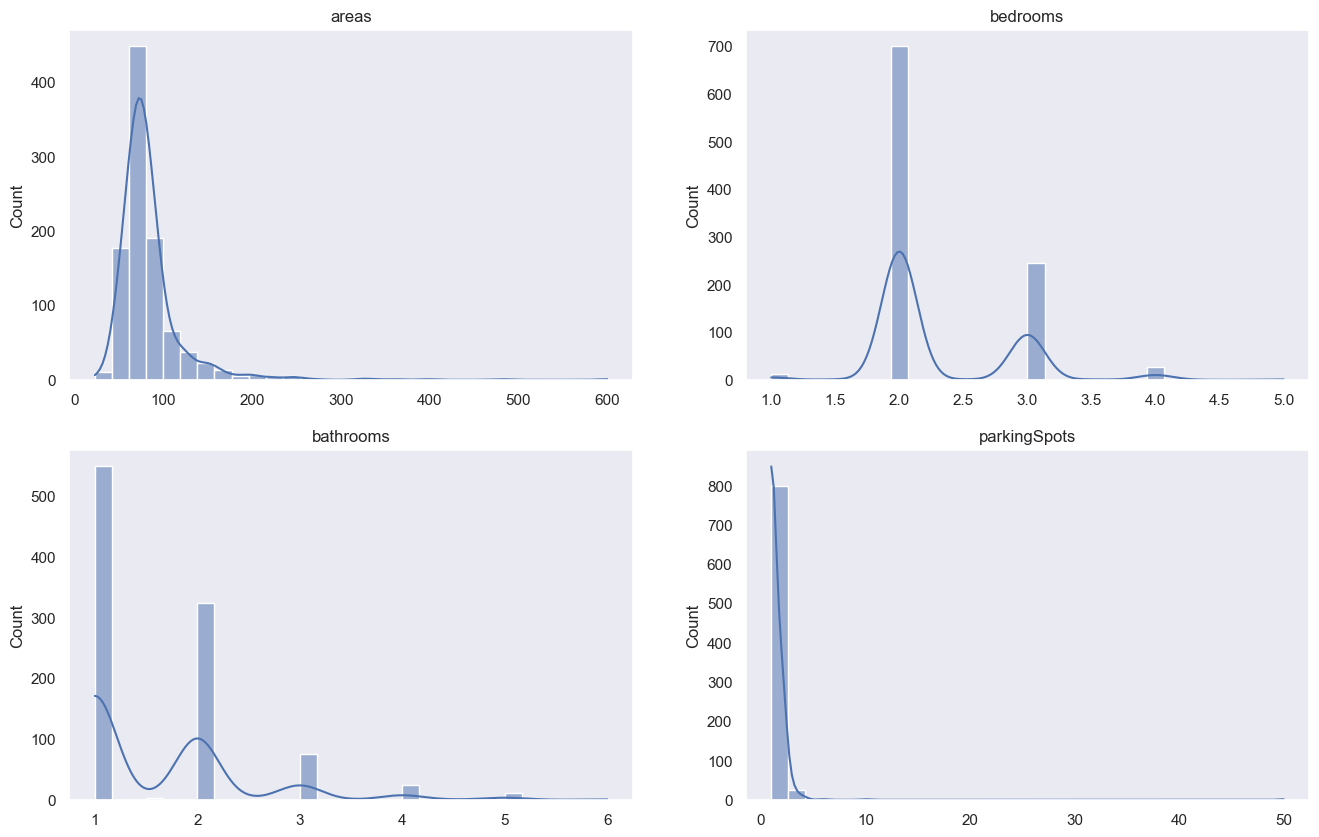

In [78]:
categories = np.reshape(["areas", "bedrooms", "bathrooms", "parkingSpots"], (2,2))

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i in range(2):
    for j in range(2):
        axs[i][j].set_title(categories[i][j])
        sns.histplot(x=df[categories[i][j]], bins=30, ax=axs[i][j], kde=True).set(xlabel=None)

There where a few registers in the discrete columns (i.e. bathrooms, parkingSpots and bedrooms) that where labeled "x-y" (e.g. "2-4" bedrooms),
 so when processing the scraped data, we took the mean of these values.

### Prices

Text(0.5, 1.0, 'Housings under R$ 700,000')

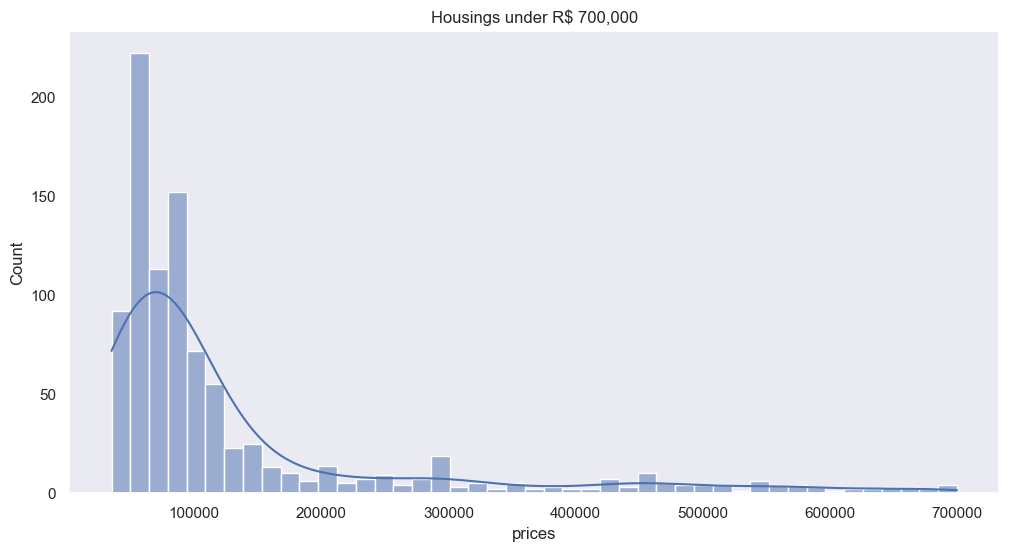

In [79]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
sns.histplot(x=df[df.prices < 700000].prices, kde=True).set_title("Housings under R$ 700,000")

Text(0.5, 1.0, 'Housings over R$ 700,000')

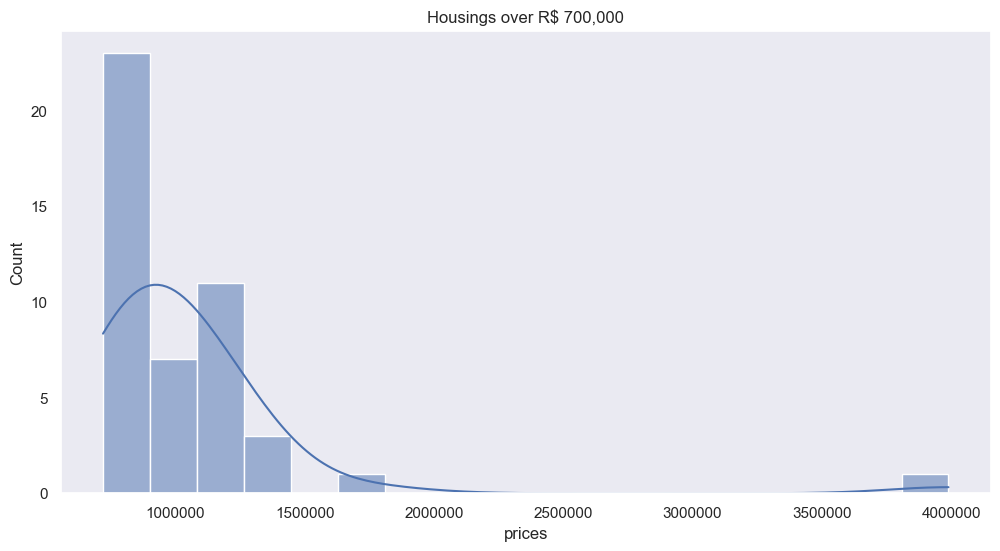

In [80]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
sns.histplot(x=df[df.prices > 700000].prices, kde=True).set_title("Housings over R$ 700,000")

### Categorical Columns

In [81]:
df.neighborhood.value_counts()

neighborhood
Ribeira                          51
Pernambués                       34
Paripe                           31
Itapuã                           30
Sao Caetano                      25
BA                               23
Liberdade                        21
Castelo Branco                   20
Boca do Rio                      19
Imbuí                            19
Uruguai                          19
Cajazeiras X                     18
Patamares                        16
Pituba                           16
Dom Avelar                       16
Cabula VI                        14
Iapi                             14
Caixa D´Água                     14
Bonfim                           14
Plataforma                       13
Doron                            13
Lobato                           13
Engenho Velho de Brotas          13
Pituaçu                          12
Resgate                          12
Águas Claras                     12
Fazenda Grande do Retiro         12
Saboeiro       

'BA' seems to be a parsing error due to lack of neighborhood on the raw data (BA stands for Bahia, which is the state, not the neighborhood). We'll set that as NaN.

In [82]:
df.neighborhood = df.neighborhood.apply(lambda x: np.nan if x == "BA" else x)

<Axes: xlabel='type', ylabel='count'>

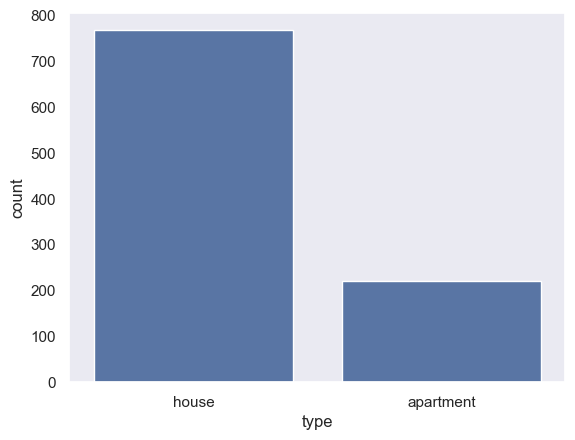

In [83]:
sns.countplot(x=df.type)

### Houses vs Apartments

In [84]:
df[df.type == "apartment"].describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,221.000000,221.000000,221.000000,203.000000,2.210000e+02
mean,82.644796,2.436652,2.271493,1.800493,4.832695e+05
std,37.104696,0.691221,1.092766,3.454564,3.966649e+05
min,29.000000,1.000000,1.000000,1.000000,4.000000e+04
25%,59.000000,2.000000,1.000000,1.000000,2.179000e+05
50%,75.000000,2.000000,2.000000,2.000000,4.200000e+05
75%,90.000000,3.000000,3.000000,2.000000,6.499900e+05
max,330.000000,4.000000,6.000000,50.000000,3.990000e+06


In [85]:
df[df.type == "house"].describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,767.000000,767.000000,767.000000,622.000000,767.000000
mean,84.736636,2.256845,1.423729,1.263666,87011.747066
std,41.500304,0.493299,0.649652,0.650478,71077.683337
min,23.000000,2.000000,1.000000,1.000000,35000.000000
25%,68.000000,2.000000,1.000000,1.000000,50000.000000
50%,76.000000,2.000000,1.000000,1.000000,70000.000000
75%,90.000000,2.000000,2.000000,1.000000,95000.000000
max,600.000000,5.000000,6.000000,10.000000,890000.000000


### Prices vs Areas

<Axes: xlabel='areas', ylabel='prices'>

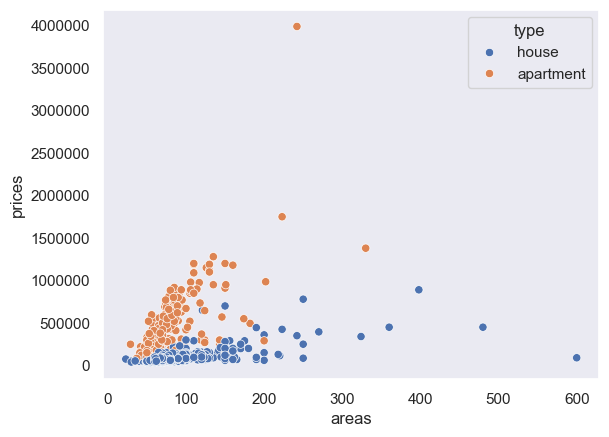

In [86]:
plt.ticklabel_format(style='plain')
sns.scatterplot(x=df.areas, y=df.prices, hue=df.type)

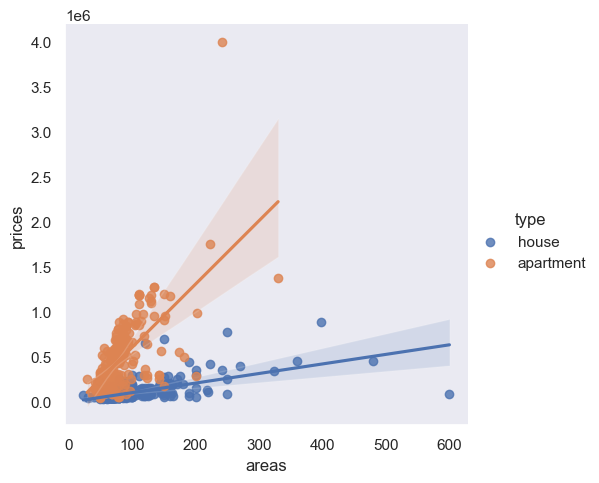

In [87]:
sns.lmplot(data=df, x="areas", y="prices", hue="type")

Apartments' price/area relationship is way more steep than houses'.

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Area'),
 Text(0.5, 1.0, 'Price vs Area (Houses)')]

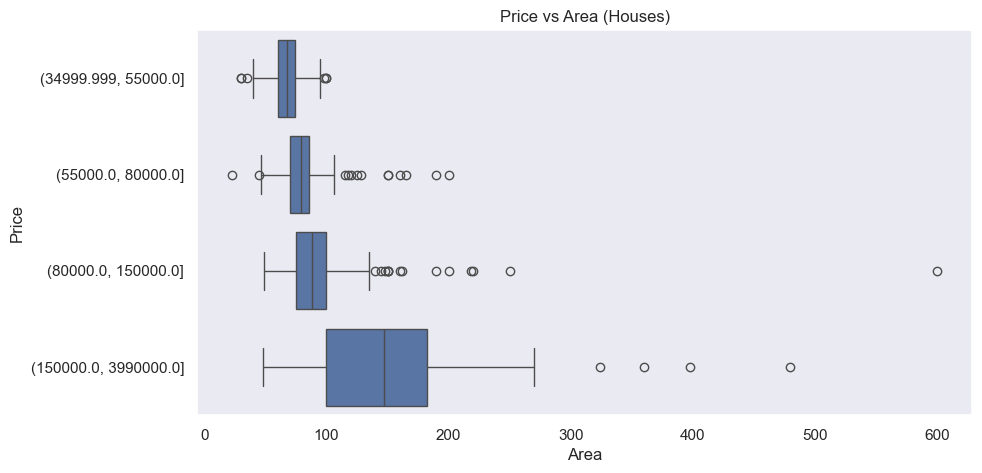

In [88]:
df1 = df.copy()
df1['prices_bins'] = pd.qcut(df.prices, q=[0, .25, .5, .75, 1], duplicates='drop')

plt.figure(figsize=(10,5))
sns.boxplot(x=df1[df1.type == "house"].areas, y=df1[df1.type == "house"].prices_bins).set(
    ylabel="Price", xlabel="Area", title="Price vs Area (Houses)")

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Area'),
 Text(0.5, 1.0, 'Price vs Area (Apartments)')]

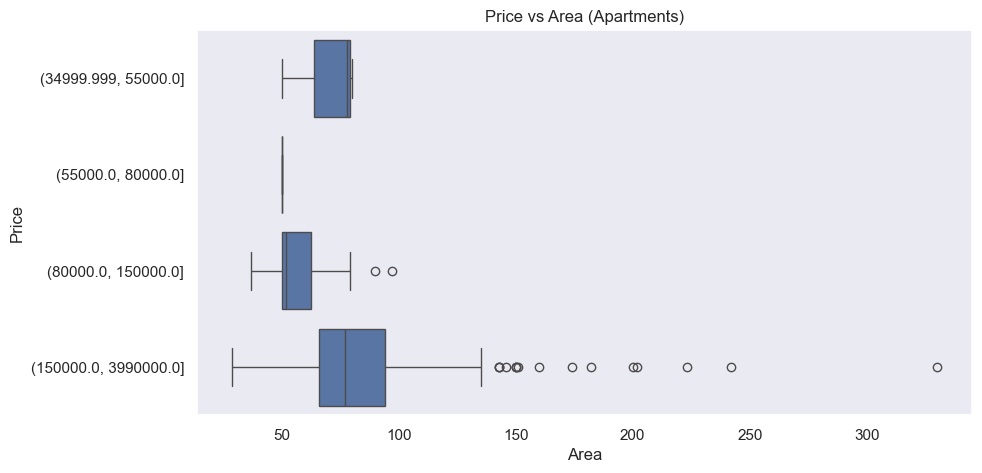

In [89]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1[df1.type == "apartment"].areas, y=df1[df1.type == "apartment"].prices_bins).set(
    ylabel="Price", xlabel="Area", title="Price vs Area (Apartments)")

The odd distribution here might be due to lack of apartment data.

### Prices vs Other Features

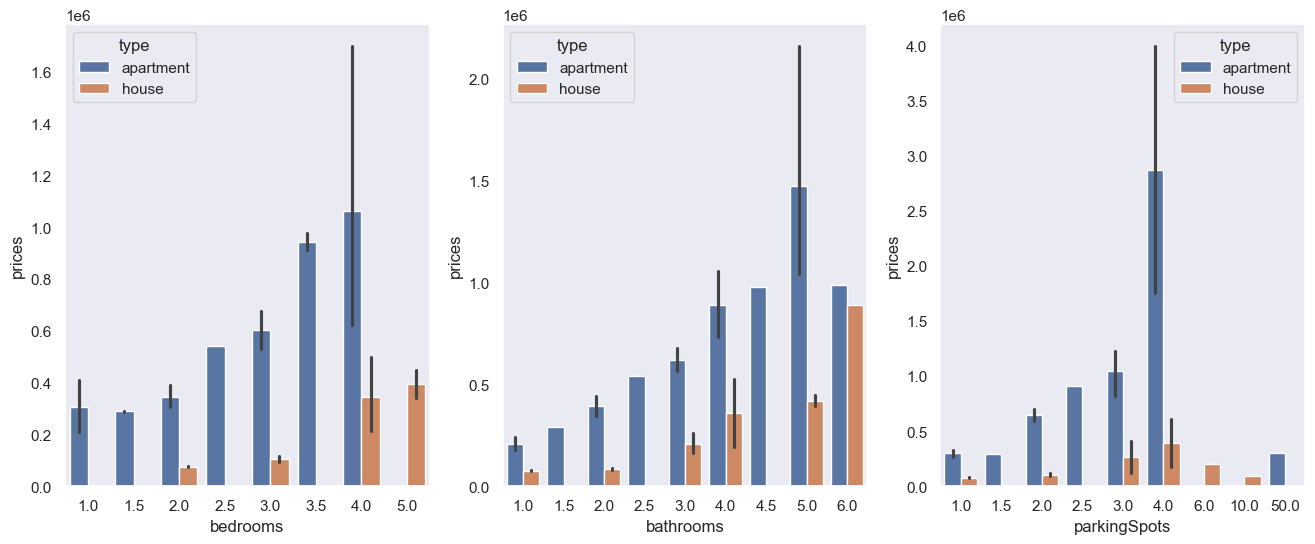

In [90]:
categories = ["bedrooms", "bathrooms", "parkingSpots"]

fig, ax = plt.subplots(1, 3, figsize=(16, 6))

for i in range(3):
    sns.barplot(x=df[categories[i]], y=df.prices, hue=df.type, ax=ax[i])